In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_excel("Data.xlsx")
df

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted
0,10000.0,2018-07-01 00:00:00,credit_card,690.0,14.2200,305xx,GA,10+ years,1
1,1000.0,24-05-2011,major_purchase,466.0,0.2800,881xx,NM,< 1 year,0
2,20000.0,2015-05-01 00:00:00,credit_card,685.0,22.2600,370xx,TN,10+ years,1
3,16000.0,2018-05-01 00:00:00,debt_consolidation,730.0,12.9900,075xx,NJ,1 year,1
4,14000.0,2016-11-01 00:00:00,debt_consolidation,720.0,10.8600,347xx,FL,10+ years,1
...,...,...,...,...,...,...,...,...,...
165459,15000.0,2010-02-09 00:00:00,debt_consolidation,671.0,0.2808,170xx,PA,< 1 year,0
165460,18000.0,2011-07-12 00:00:00,credit_card,691.0,0.1892,234xx,VA,< 1 year,0
165461,9650.0,2014-07-01 00:00:00,debt_consolidation,710.0,12.5800,946xx,CA,< 1 year,1
165462,2500.0,16-06-2009,Student,564.0,0.1109,152xx,PA,< 1 year,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount.Requested      165463 non-null  float64
 1   Application.Date      165463 non-null  object 
 2   Loan.Title            165462 non-null  object 
 3   Risk_Score            151980 non-null  float64
 4   Debt.To.Income.Ratio  165361 non-null  float64
 5   Zip.Code              165460 non-null  object 
 6   State                 165461 non-null  object 
 7   Employment.Length     157022 non-null  object 
 8   Accepted              165464 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 11.4+ MB


In [4]:
df = df[df["Application.Date"].notnull()]
df = df.reindex(labels=range(df.shape[0]))

In [5]:
df["Application.Date"] = pd.to_datetime(df["Application.Date"], infer_datetime_format=True)
df["Application.Year"] = df["Application.Date"].dt.year
df["Application.Month"] = df["Application.Date"].dt.month

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-09-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-06-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-08-2012' in DD/MM/YYYY format. Provide format or specif

In [6]:
df.sort_values(by="Risk_Score", ascending=False)

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,Application.Year,Application.Month
100973,20000.0,2016-04-16,Credit card refinancing,926.0,0.7102,114xx,NY,NaN,0.0,2016.0,4.0
79246,6000.0,2016-04-21,other,904.0,0.1075,913xx,CA,< 1 year,0.0,2016.0,4.0
33050,40000.0,2016-11-04,small_business,904.0,0.0494,913xx,CA,< 1 year,0.0,2016.0,11.0
150037,3000.0,2016-04-21,debt_consolidation,883.0,0.0231,606xx,IL,2 years,0.0,2016.0,4.0
128030,17000.0,2016-08-04,home_improvement,857.0,0.1930,453xx,OH,NaN,0.0,2016.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
165420,1500.0,2016-08-04,major_purchase,NaN,0.0330,544xx,WI,< 1 year,0.0,2016.0,8.0
165424,40000.0,2016-04-13,vacation,NaN,-0.0100,900xx,CA,< 1 year,0.0,2016.0,4.0
165427,4000.0,2016-04-15,car,NaN,0.1983,980xx,WA,5 years,0.0,2016.0,4.0
165443,25000.0,2016-06-04,major_purchase,NaN,0.2011,928xx,CA,< 1 year,0.0,2016.0,6.0


In [7]:
df.query(""" State == "TX" and Accepted == 0 """)["Accepted"].count()

4346

In [8]:
df[(df["Debt.To.Income.Ratio"] <= 99.99) & (df["Debt.To.Income.Ratio"] >= 0)]

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,Application.Year,Application.Month
0,10000.0,2018-07-01,credit_card,690.0,14.2200,305xx,GA,10+ years,1.0,2018.0,7.0
1,1000.0,2011-05-24,major_purchase,466.0,0.2800,881xx,NM,< 1 year,0.0,2011.0,5.0
2,20000.0,2015-05-01,credit_card,685.0,22.2600,370xx,TN,10+ years,1.0,2015.0,5.0
3,16000.0,2018-05-01,debt_consolidation,730.0,12.9900,075xx,NJ,1 year,1.0,2018.0,5.0
4,14000.0,2016-11-01,debt_consolidation,720.0,10.8600,347xx,FL,10+ years,1.0,2016.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
165458,12000.0,2012-09-01,debt_consolidation,705.0,23.5100,054xx,VT,10+ years,1.0,2012.0,9.0
165459,15000.0,2010-02-09,debt_consolidation,671.0,0.2808,170xx,PA,< 1 year,0.0,2010.0,2.0
165460,18000.0,2011-07-12,credit_card,691.0,0.1892,234xx,VA,< 1 year,0.0,2011.0,7.0
165461,9650.0,2014-07-01,debt_consolidation,710.0,12.5800,946xx,CA,< 1 year,1.0,2014.0,7.0


In [9]:
df[(df["Risk_Score"] <= 850) & (df["Risk_Score"] >= 350)]

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,Application.Year,Application.Month
0,10000.0,2018-07-01,credit_card,690.0,14.2200,305xx,GA,10+ years,1.0,2018.0,7.0
1,1000.0,2011-05-24,major_purchase,466.0,0.2800,881xx,NM,< 1 year,0.0,2011.0,5.0
2,20000.0,2015-05-01,credit_card,685.0,22.2600,370xx,TN,10+ years,1.0,2015.0,5.0
3,16000.0,2018-05-01,debt_consolidation,730.0,12.9900,075xx,NJ,1 year,1.0,2018.0,5.0
4,14000.0,2016-11-01,debt_consolidation,720.0,10.8600,347xx,FL,10+ years,1.0,2016.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
165458,12000.0,2012-09-01,debt_consolidation,705.0,23.5100,054xx,VT,10+ years,1.0,2012.0,9.0
165459,15000.0,2010-02-09,debt_consolidation,671.0,0.2808,170xx,PA,< 1 year,0.0,2010.0,2.0
165460,18000.0,2011-07-12,credit_card,691.0,0.1892,234xx,VA,< 1 year,0.0,2011.0,7.0
165461,9650.0,2014-07-01,debt_consolidation,710.0,12.5800,946xx,CA,< 1 year,1.0,2014.0,7.0


In [10]:
df.groupby("Accepted").agg({"Amount.Requested": np.sum}).astype(int)

,Amount.Requested
Accepted,
0.0,690402570
1.0,1701792925


In [11]:
df["Accepted"].value_counts()

1.0    113211
0.0     52251
Name: Accepted, dtype: int64

In [12]:
df.query(""" State == "CA" """)["Risk_Score"].count()

20755

In [13]:
df[df["Employment.Length"] == "7 years"]["Amount.Requested"].max()

40000.0

In [14]:
df.groupby("State")["State"].agg("count").sort_values(ascending=False).head(20)

State
CA    22381
TX    13764
NY    13351
FL    12334
IL     6697
PA     6218
NJ     6120
GA     5720
OH     5639
VA     4679
NC     4555
MI     4412
MA     3930
MD     3832
AZ     3729
WA     3318
CO     3290
MO     2798
MN     2725
CT     2635
Name: State, dtype: int64

In [15]:
df.reset_index(inplace=True)
df["index"] += 1
df.rename(columns={"index": "Applicant ID"}, inplace=True)
df

,Applicant ID,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,Application.Year,Application.Month
0,1,10000.0,2018-07-01,credit_card,690.0,14.2200,305xx,GA,10+ years,1.0,2018.0,7.0
1,2,1000.0,2011-05-24,major_purchase,466.0,0.2800,881xx,NM,< 1 year,0.0,2011.0,5.0
2,3,20000.0,2015-05-01,credit_card,685.0,22.2600,370xx,TN,10+ years,1.0,2015.0,5.0
3,4,16000.0,2018-05-01,debt_consolidation,730.0,12.9900,075xx,NJ,1 year,1.0,2018.0,5.0
4,5,14000.0,2016-11-01,debt_consolidation,720.0,10.8600,347xx,FL,10+ years,1.0,2016.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165458,165459,12000.0,2012-09-01,debt_consolidation,705.0,23.5100,054xx,VT,10+ years,1.0,2012.0,9.0
165459,165460,15000.0,2010-02-09,debt_consolidation,671.0,0.2808,170xx,PA,< 1 year,0.0,2010.0,2.0
165460,165461,18000.0,2011-07-12,credit_card,691.0,0.1892,234xx,VA,< 1 year,0.0,2011.0,7.0
165461,165462,9650.0,2014-07-01,debt_consolidation,710.0,12.5800,946xx,CA,< 1 year,1.0,2014.0,7.0


In [16]:
df[df["Applicant ID"] == 1089]["Debt.To.Income.Ratio"]

1088    14.3
Name: Debt.To.Income.Ratio, dtype: float64

In [17]:
lookup_table = {'NJ': 'Northeast','GA': 'Southeast','CA': 'West','OR': 'West','LA': 'South',
                'FL': 'Southeast','AK': 'West', 'CT': 'Northeast','MA': 'Northeast','MS': 'South',
                'TX': 'South','NY': 'Northeast','AZ': 'West','MT': 'West','MD': 'Northeast',
                'AR': 'South','MN': 'Midwest','OK': 'South','UT': 'West','NE': 'Midwest',
                'IL': 'Midwest','IN': 'Midwest','VA': 'South','MI': 'Midwest','RI': 'Northeast',
                'ND': 'Midwest','HI': 'West','TN': 'South','PA': 'Northeast','CO': 'West',
                'WI': 'Midwest','AL': 'South','OH': 'Midwest','NC': 'South','KY': 'South',
                'NH': 'Northeast','MO': 'Midwest','SC': 'South','WA': 'West','VT': 'Northeast',
                'DC': 'Northeast','KS': 'Midwest','NV': 'West','DE': 'Northeast','NM': 'West',
                'WV': 'South','WY': 'West','ME': 'Northeast','ID': 'West','SD': 'Midwest',
                'IA': 'Midwest'}
df["Region"] = df["State"]
df["Region"] = df["Region"].map(lookup_table)
df

,Applicant ID,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,Application.Year,Application.Month,Region
0,1,10000.0,2018-07-01,credit_card,690.0,14.2200,305xx,GA,10+ years,1.0,2018.0,7.0,Southeast
1,2,1000.0,2011-05-24,major_purchase,466.0,0.2800,881xx,NM,< 1 year,0.0,2011.0,5.0,West
2,3,20000.0,2015-05-01,credit_card,685.0,22.2600,370xx,TN,10+ years,1.0,2015.0,5.0,South
3,4,16000.0,2018-05-01,debt_consolidation,730.0,12.9900,075xx,NJ,1 year,1.0,2018.0,5.0,Northeast
4,5,14000.0,2016-11-01,debt_consolidation,720.0,10.8600,347xx,FL,10+ years,1.0,2016.0,11.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165458,165459,12000.0,2012-09-01,debt_consolidation,705.0,23.5100,054xx,VT,10+ years,1.0,2012.0,9.0,Northeast
165459,165460,15000.0,2010-02-09,debt_consolidation,671.0,0.2808,170xx,PA,< 1 year,0.0,2010.0,2.0,Northeast
165460,165461,18000.0,2011-07-12,credit_card,691.0,0.1892,234xx,VA,< 1 year,0.0,2011.0,7.0,South
165461,165462,9650.0,2014-07-01,debt_consolidation,710.0,12.5800,946xx,CA,< 1 year,1.0,2014.0,7.0,West


In [18]:
df[df["Applicant ID"] == 132467]["Loan.Title"]

132466    Moving to make it count
Name: Loan.Title, dtype: object

20750 657.1612903225806


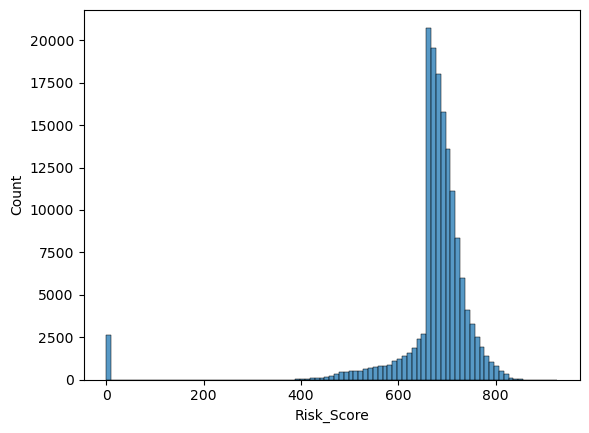

In [37]:
sns.histplot(df["Risk_Score"], bins=93)

x = np.histogram(df[df["Risk_Score"].notnull()]["Risk_Score"], bins=93)
for i, j in enumerate(x[0]):
    if j == x[0].max():
        print(x[0][i], x[1][i])
        break

In [40]:
thresh = 650
df[df["Risk_Score"] >= thresh]["Amount.Requested"].sum(), df[df["Risk_Score"] < thresh]["Amount.Requested"].sum()

(1995614922.8600001, 211606402.14)

In [62]:
sns.heatmap(df.pivot_table(index="State", values="Amount.Requested", columns="Application.Year", aggfunc="average", fill)[[2008, 2009, 2010]])

AttributeError: 'average' is not a valid function for 'DataFrameGroupBy' object